In [1]:
import pandas as pd
import numpy as np
import os
import timeit
import matplotlib.pyplot as plt
% matplotlib inline

In [59]:
path = os.getcwd() + '\Data\ex2data1.txt'
data = pd.read_csv(path, header = None, names = ['Exam1', 'Exam2', 'Admitted'])

data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualizing the data

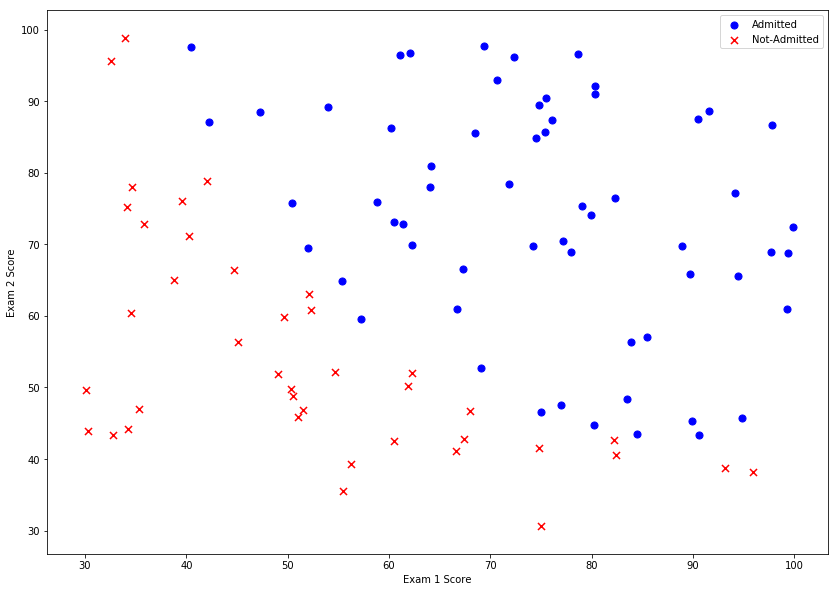

In [60]:
Positive = data[data.Admitted.isin([1])]
Negative = data[data.Admitted.isin([0])]

fig, ax = plt.subplots(figsize=(14,10))

ax.scatter(Positive.Exam1, Positive.Exam2, s=50, c='b', marker = 'o', label = 'Admitted')
ax.scatter(Negative.Exam1, Negative.Exam2, s=50, c='r', marker = 'x', label = 'Not-Admitted')

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend();

## Preparing the data

In [61]:
data.insert(0, 'ones', 1)
data.head()

,ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [65]:
cols = data.shape[1]

x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:]
x = np.array(x)
y = np.array(y)
theta = np.zeros(cols-1) 

x.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [67]:
def logistic_cost(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    inner = - np.multiply(y, np.log(sigmoid(x * theta.T))) - (np.multiply((1-y), np.log(1 - sigmoid(x * theta.T))))
    return np.sum(inner) / len(x)

In [68]:
def logistic_GD(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    return np.array(((sigmoid(x * theta.T) - y).T * x) / len(x))
    

In [69]:
logistic_cost(theta, x, y)

0.69314718055994529

In [70]:
logistic_GD(theta, x, y)

array([[ -0.1       , -12.00921659, -11.26284221]])

In [71]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=logistic_cost, x0=theta, fprime=logistic_GD, args=(x, y))
result[0], logistic_cost(result[0], x, y)

(array([-25.16131862,   0.20623159,   0.20147149]), 0.20349770158947475)

In [72]:
def predict(theta, x):
    theta = np.matrix(theta)
    x = np.matrix(x)
    Class_Prob = sigmoid(x * theta.T)
    return [1 if item >= 0.5 else 0 for item in Class_Prob]

In [75]:
theta_min = result[0]
predictions = predict(theta_min, x)
correct = [1 if a==b else 0 for a, b in zip(y, predictions)]
accuracy = sum(correct) % len(correct)
print ('Accuracy = {}%'.format(accuracy))

Accuracy = 89%


### Regularized Logistic Regression

In [119]:
path = os.getcwd() + '\data\ex2data2.txt'
data2 = pd.read_csv(path, header=None, names = ['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### Visualizing the data

In [120]:
aa = range(1,5)
aa

range(1, 5)

Text(0,0.5,'Test 2')

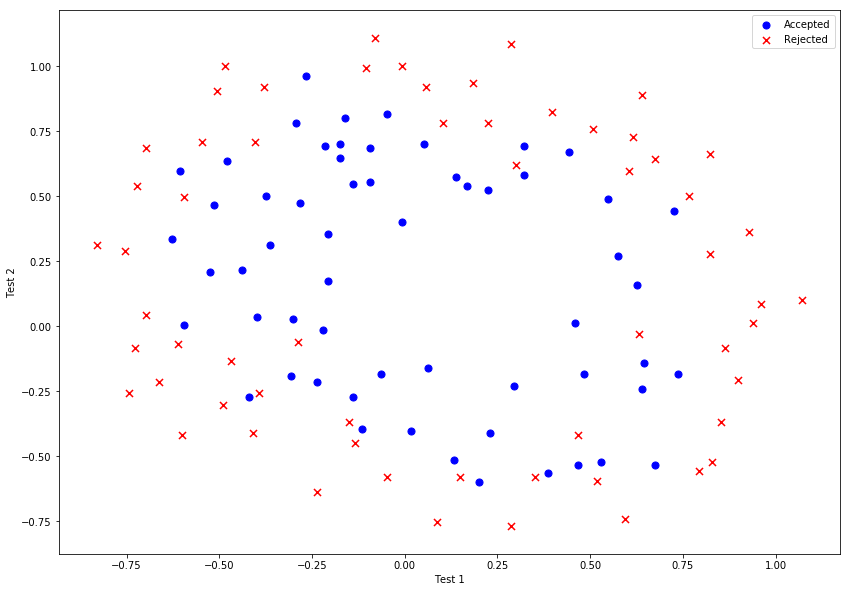

In [121]:
positive = data2[data2.Accepted.isin([1])]
negative = data2[data2.Accepted.isin([0])]

fig, ax = plt.subplots(figsize = (14, 10))

ax.scatter(positive['Test 1'], positive['Test 2'], s = 50, marker = 'o', c = 'b', label = 'Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s = 50, marker = 'x', c= 'r', label = 'Rejected')

ax.legend()
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')

In [122]:
degree = 4  
x1 = data2['Test 1']  
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)  
data2.drop('Test 2', axis=1, inplace=True)

data2.head()  

,Accepted,Ones,F10,F20,F21,F30,F31,F32
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283


In [123]:
len(x1)

118

In [124]:
data2.shape

(118, 8)

In [140]:
(np.power(theta[:,1:theta.shape[1]], 2))

matrix([[1, 4]], dtype=int32)

In [128]:
theta

array([ 0.,  0.,  0.])

In [142]:
theta.shape[1]

AttributeError: 'list' object has no attribute 'shape'

In [143]:
theta = [0, 1, 2]   
theta = np.matrix(theta)

In [145]:
data.shape

(100, 4)